In [1]:
import os
import numpy as np
import shutup; shutup.please()
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore") 

os.chdir('/home/svenl/repos/research/pelger/missing_data_pub/src/')

data = np.load('../data/raw_rank_trunk_chars.npz')
percentile_rank_chars = data['rank_chars']
regular_chars = data['raw_chars']
chars = data['chars']
dates = data['dates']
return_panel = data['returns']
permnos = data['permnos']
rts = data['rfs']
monthly_updates = data['monthly_updates']

In [2]:
from plots_and_tables import appendix, section_2, section_4, section_5, section_6

In [3]:
char_groupings  = [('A2ME', "Q"),
                   ('AC', 'Q'),
('AT', 'Q'),
('ATO', 'Q'),
('B2M', 'QM'),
('BETA_d', 'M'),
('BETA_m', 'M'),
('C2A', 'Q'),
('CF2B', 'Q'),
('CF2P', 'QM'),
('CTO', 'Q'),
('D2A', 'Q'),
('D2P', 'M'),
('DPI2A', 'Q'),
('E2P', 'QM'),
('FC2Y', 'QY'),
('IdioVol', 'M'),
('INV', 'Q'),
('LEV', 'Q'),
('ME', 'M'),
('TURN', 'M'),
('NI', 'Q'),
('NOA', 'Q'),
('OA', 'Q'),
('OL', 'Q'),
('OP', 'Q'),
('PCM', 'Q'),
('PM', 'Q'),
('PROF', 'QY'),
('Q', 'QM'),
('R2_1', 'M'),
('R12_2', 'M'),
('R12_7', 'M'),
('R36_13', 'M'),
('R60_13', 'M'),
('HIGH52', 'M'),
('RVAR', 'M'),
('RNA', 'Q'),
('ROA', 'Q'),
('ROE', 'Q'),
('S2P', 'QM'),
('SGA2S', 'Q'),
('SPREAD', 'M'),
('SUV', 'M'),
('VAR', 'M')]
char_map = {x[0]:x[1] for x in char_groupings}

# Appendix

## Table A.1: Imputation Error for Alternative Implementations


In [4]:
import importlib
importlib.reload(appendix)

<module 'plots_and_tables.appendix' from '/home/svenl/repos/research/pelger/missing_data_pub/src/plots_and_tables/appendix.py'>

In [5]:
result = appendix.ComparisonOfModelConfigs()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, monthly_updates, char_map)

(22351, 45)
(22351, 45)
(22351, 45)


## Simulations

### Figure A.1: Errors with Missing-Completely-at-Random

In [14]:
import importlib
importlib.reload(appendix)

<module 'plots_and_tables.appendix' from '/home/svenl/repos/research/pelger/missing_data_pub/src/plots_and_tables/appendix.py'>

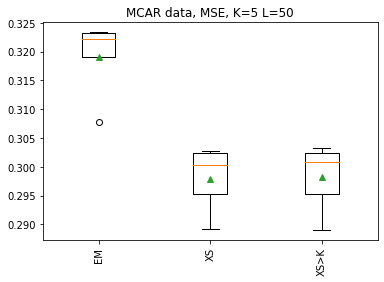

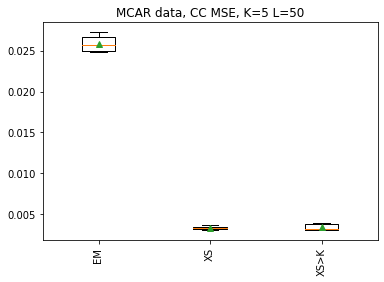

In [ ]:
plot = appendix.Simulation()
plot.run('MAR')

### Figure A.2: Imputation Errors with Missing-Conditionally-at-Random

In [ ]:
plot = appendix.Simulation()
plot.run('Lmbda')

## Table C.2: Missing by Characteristic Quintiles


In [ ]:
plot = section_2.MssingByQuintile()
plot.setup(percentile_rank_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
display(plot.data_df)
plot.run()

## Table C.3: Lengths of Missing Blocks

In [ ]:
plot = section_2.MssingBlockLengths()
plot.setup(percentile_rank_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
display(plot.data_df)
plot.run()

## Figure D.1: Missing Observations over Time By Characteristics

In [ ]:
# martin

## Figure D.2: Missing Observations by Characteristic Pooled by Stocks

In [ ]:
# martin

## Figure D.3: Heatmap of Pairwise Correlation from 1967–1976 

In [ ]:
# martin

## Figure D.4: Standard Deviation of Characteristic Ranks

In [ ]:
# martin

## Figure D.5: Generalized Correlation of Global and Local Factor Weights

In [ ]:
plot = section_4.GenCorr()
plot.setup(percentile_rank_chars, return_panel, dates)
plot.run()

## Figure D.6: Composition of Proxy Factors by Characteristic Categories

In [ ]:
result = appendix.SparseFactors()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates)

## Figure D.8: Global and Local Imputation for Individual Characteristics

In [ ]:
import importlib
importlib.reload(section_5)

In [ ]:
plot = section_5.ImputationErrorPlots()
plot.setup(percentile_rank_chars, chars, monthly_updates, dates)
plot.run()

## Figure D.9: Top and Bottom Deciles with and without Missing Values

In [ ]:
char_groupings = {
    "Past Returns" : ['R2_1', 'R12_2', 'R12_7', 'R36_13', 'R60_13', 'HIGH52'],
    "Investment": ['INV', 'NOA', 'DPI2A', 'NI'],
    "Profitability": ['PROF', 'ATO', 'CTO', 'FC2Y', 'OP', 'PM', 'RNA', 'ROA', 'ROE', 'SGA2S', 
                     'D2A'],
    "Intangibles": ['AC', 'OA', 'OL', 'PCM'],
    "Value": ['A2ME', 'B2M',  'C2A', 'CF2B', 'CF2P', 'D2P', 'E2P', 'Q',  'S2P'],
    "Trading Frictions": ['BETA_d', 'BETA_m', 'SPREAD'],
    "Other": ['AT', 'LEV', 'IdioVol', 'ME', 'TURN', 'RVAR', 'SUV', 'VAR']
}
import numpy as np
size_ind = np.argwhere(chars == 'ME')[0][0]
plot = section_6.UnivariateBarDiffs()
plot.setup(percentile_rank_chars, chars, return_panel, char_groupings,
        regular_chars, dates, permnos)
plot.run()

## Figure D.10: Sharpe Ratios with Non-parametric IPCA Factors

In [ ]:
result = appendix.NonlinearIPCA()
result.setup(percentile_rank_chars, return_panel,
             char_groupings, chars, 
             np.array(rts), expansion_dim=10)